<a href="https://colab.research.google.com/github/Matheus-Godinho-Magalhaes/Final_Paper/blob/main/YOLO11_Custom_training_for_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**How to Train YOLO11 Object Detection Model on a Custom Dataset**

Data: https://universe.roboflow.com/project-uyrxf/ppe_detection-v1x3l/dataset/1#

In [ ]:
# Verificando qual GPU foi alocada
!nvidia-smi

Wed May  7 17:26:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 01 # Install the Ultralytics Package**

In [ ]:
!pip install ultralytics

**Step 02 # Import All the Requried Libraries**

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [ ]:
!pip install roboflow

In [ ]:
#Usando link da api do roboflow para poder fazer o download do dataset com as imagens
from roboflow import Roboflow
rf = Roboflow(api_key="CHANGE_HERE")
project = rf.workspace("godinho").project("ufmg")
version = project.version(3)
dataset = version.download("yolov11")




loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to UFMG-3 in yolov11:: 100%|██████████| 2897/2897 [00:01<00:00, 2858.91it/s]


In [ ]:
dataset.location

'/content/UFMG-3'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [ ]:
# Linha de código CLI para realizar o trainamento do modelo
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11m.pt" epochs=80 imgsz=640 batch=-1 name=ufmg_yolov11m_run1

100% 38.8M/38.8M [00:00<00:00, 282MB/s]
Ultralytics 8.3.128 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/UFMG-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=ufmg_yolov11m_run1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, 

**Step # 05 Examine Training Results**

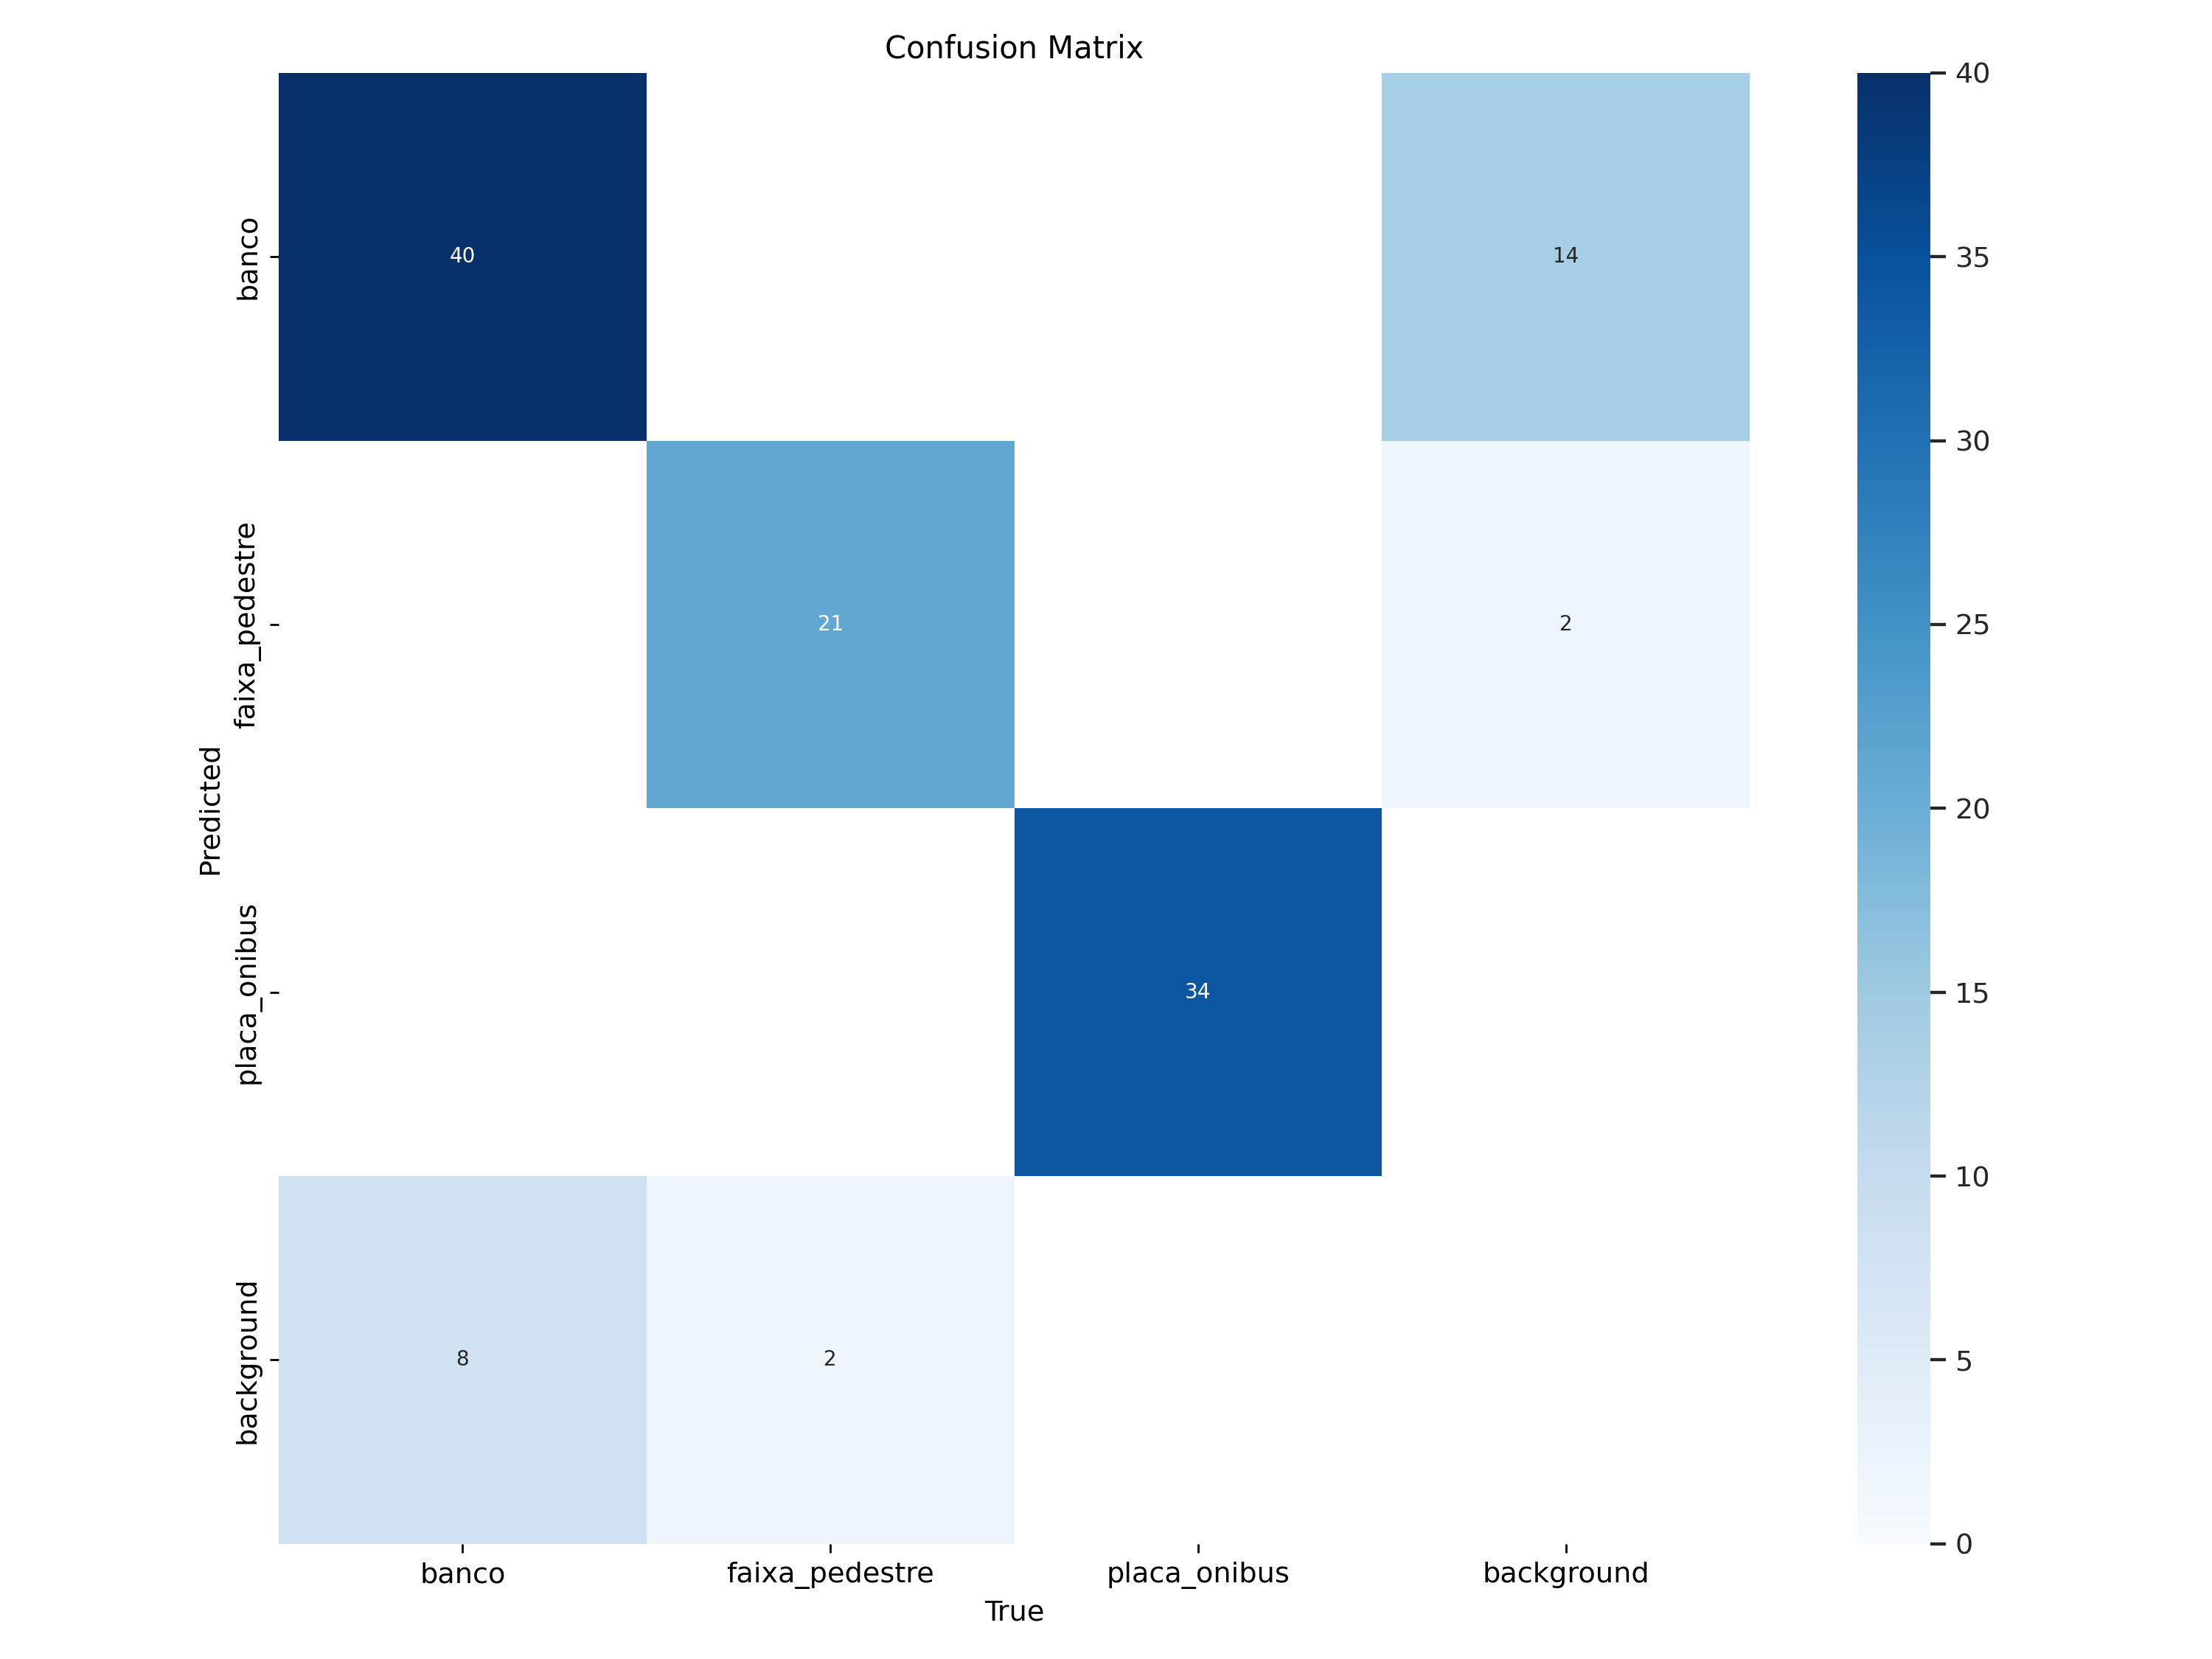

In [ ]:
# Verificando os resultados
Image("/content/runs/detect/ufmg_yolov11m_run1/confusion_matrix.png", width=600)

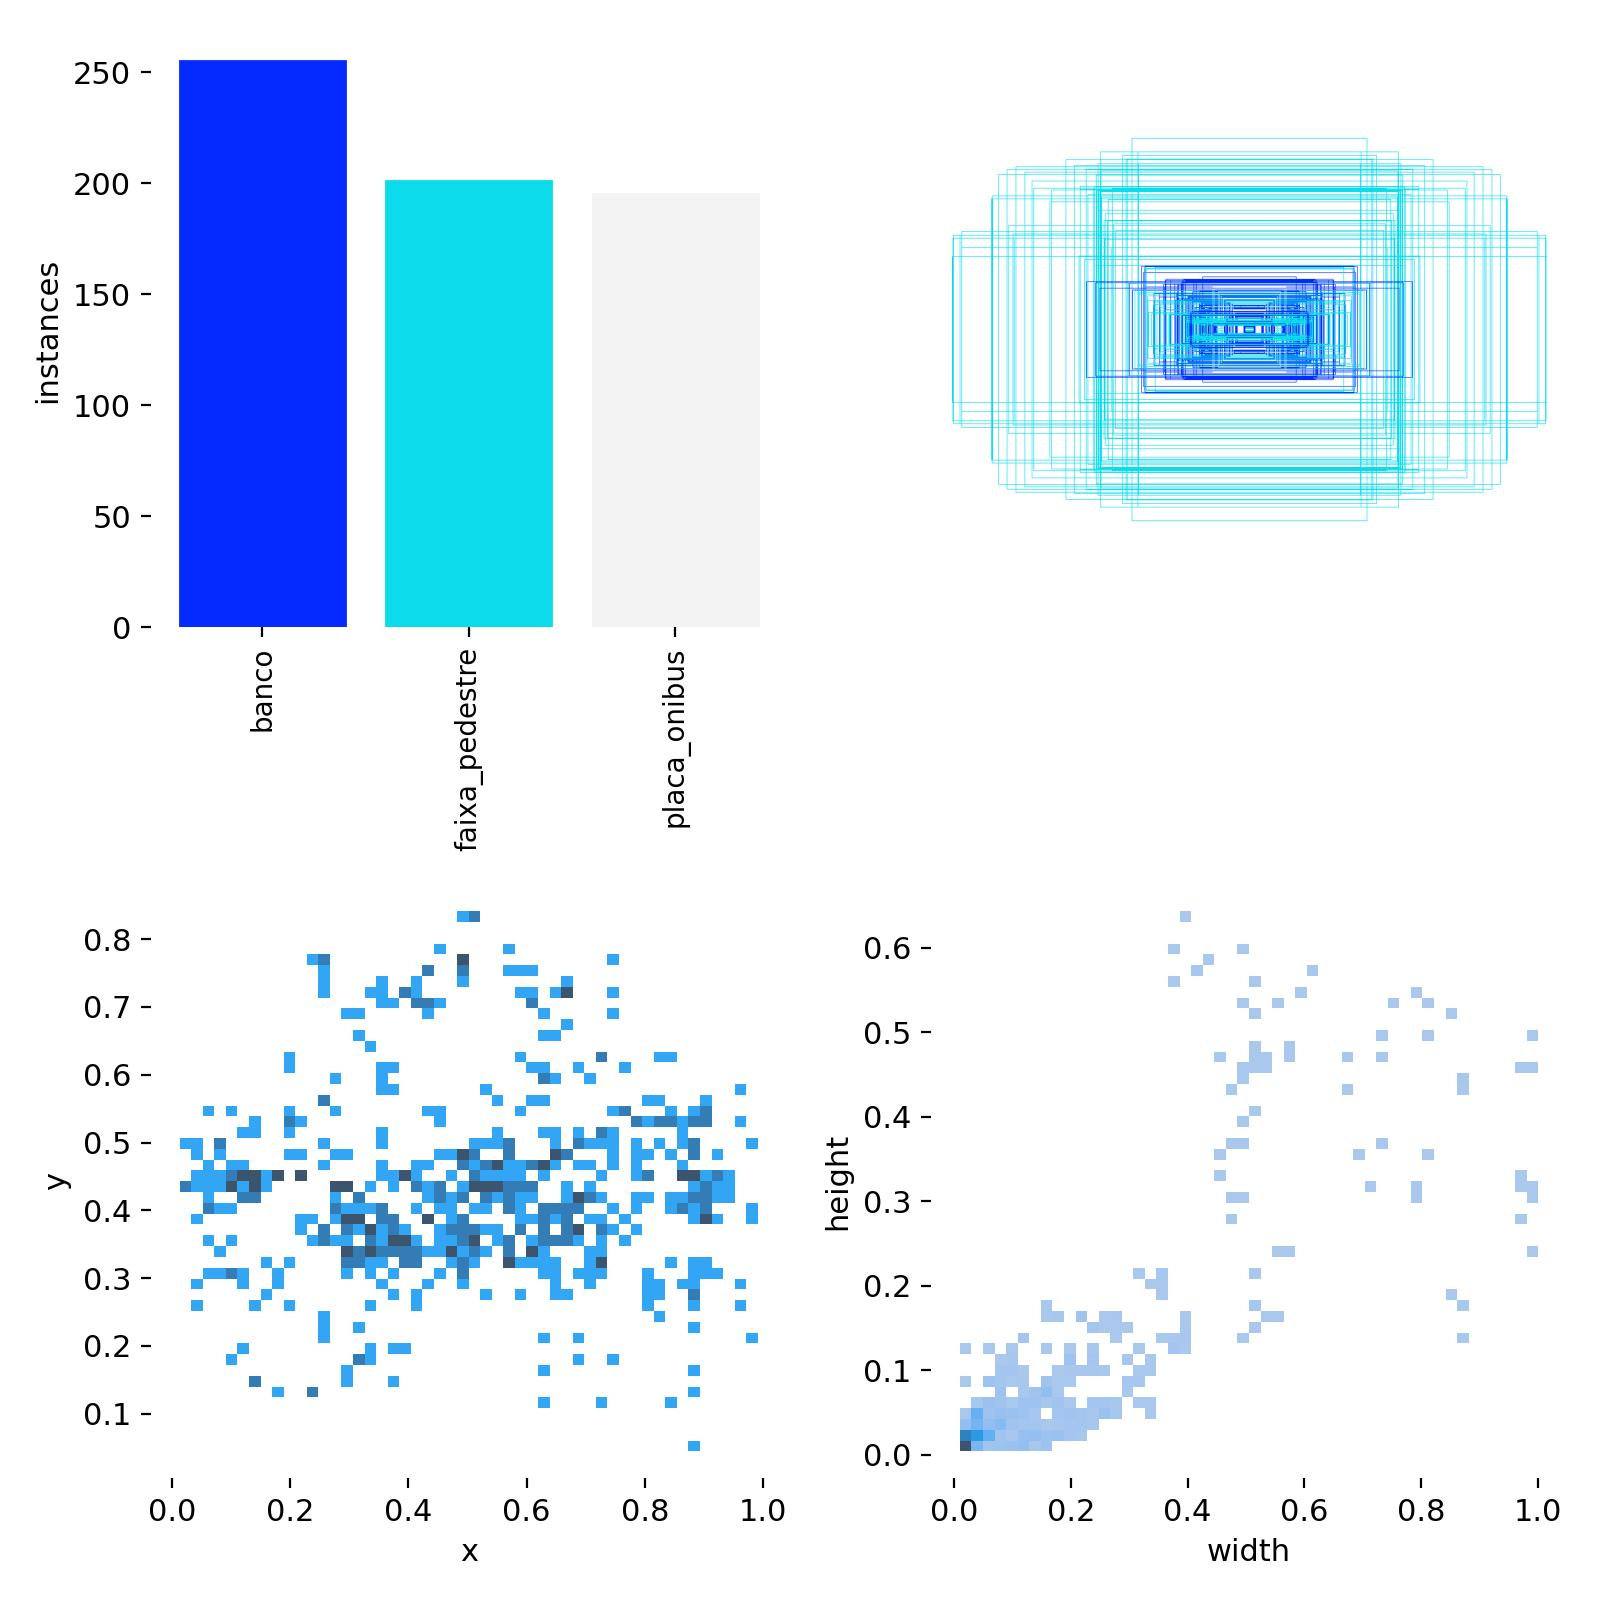

In [ ]:
Image("/content/runs/detect/ufmg_yolov11m_run1/labels.jpg", width=600)

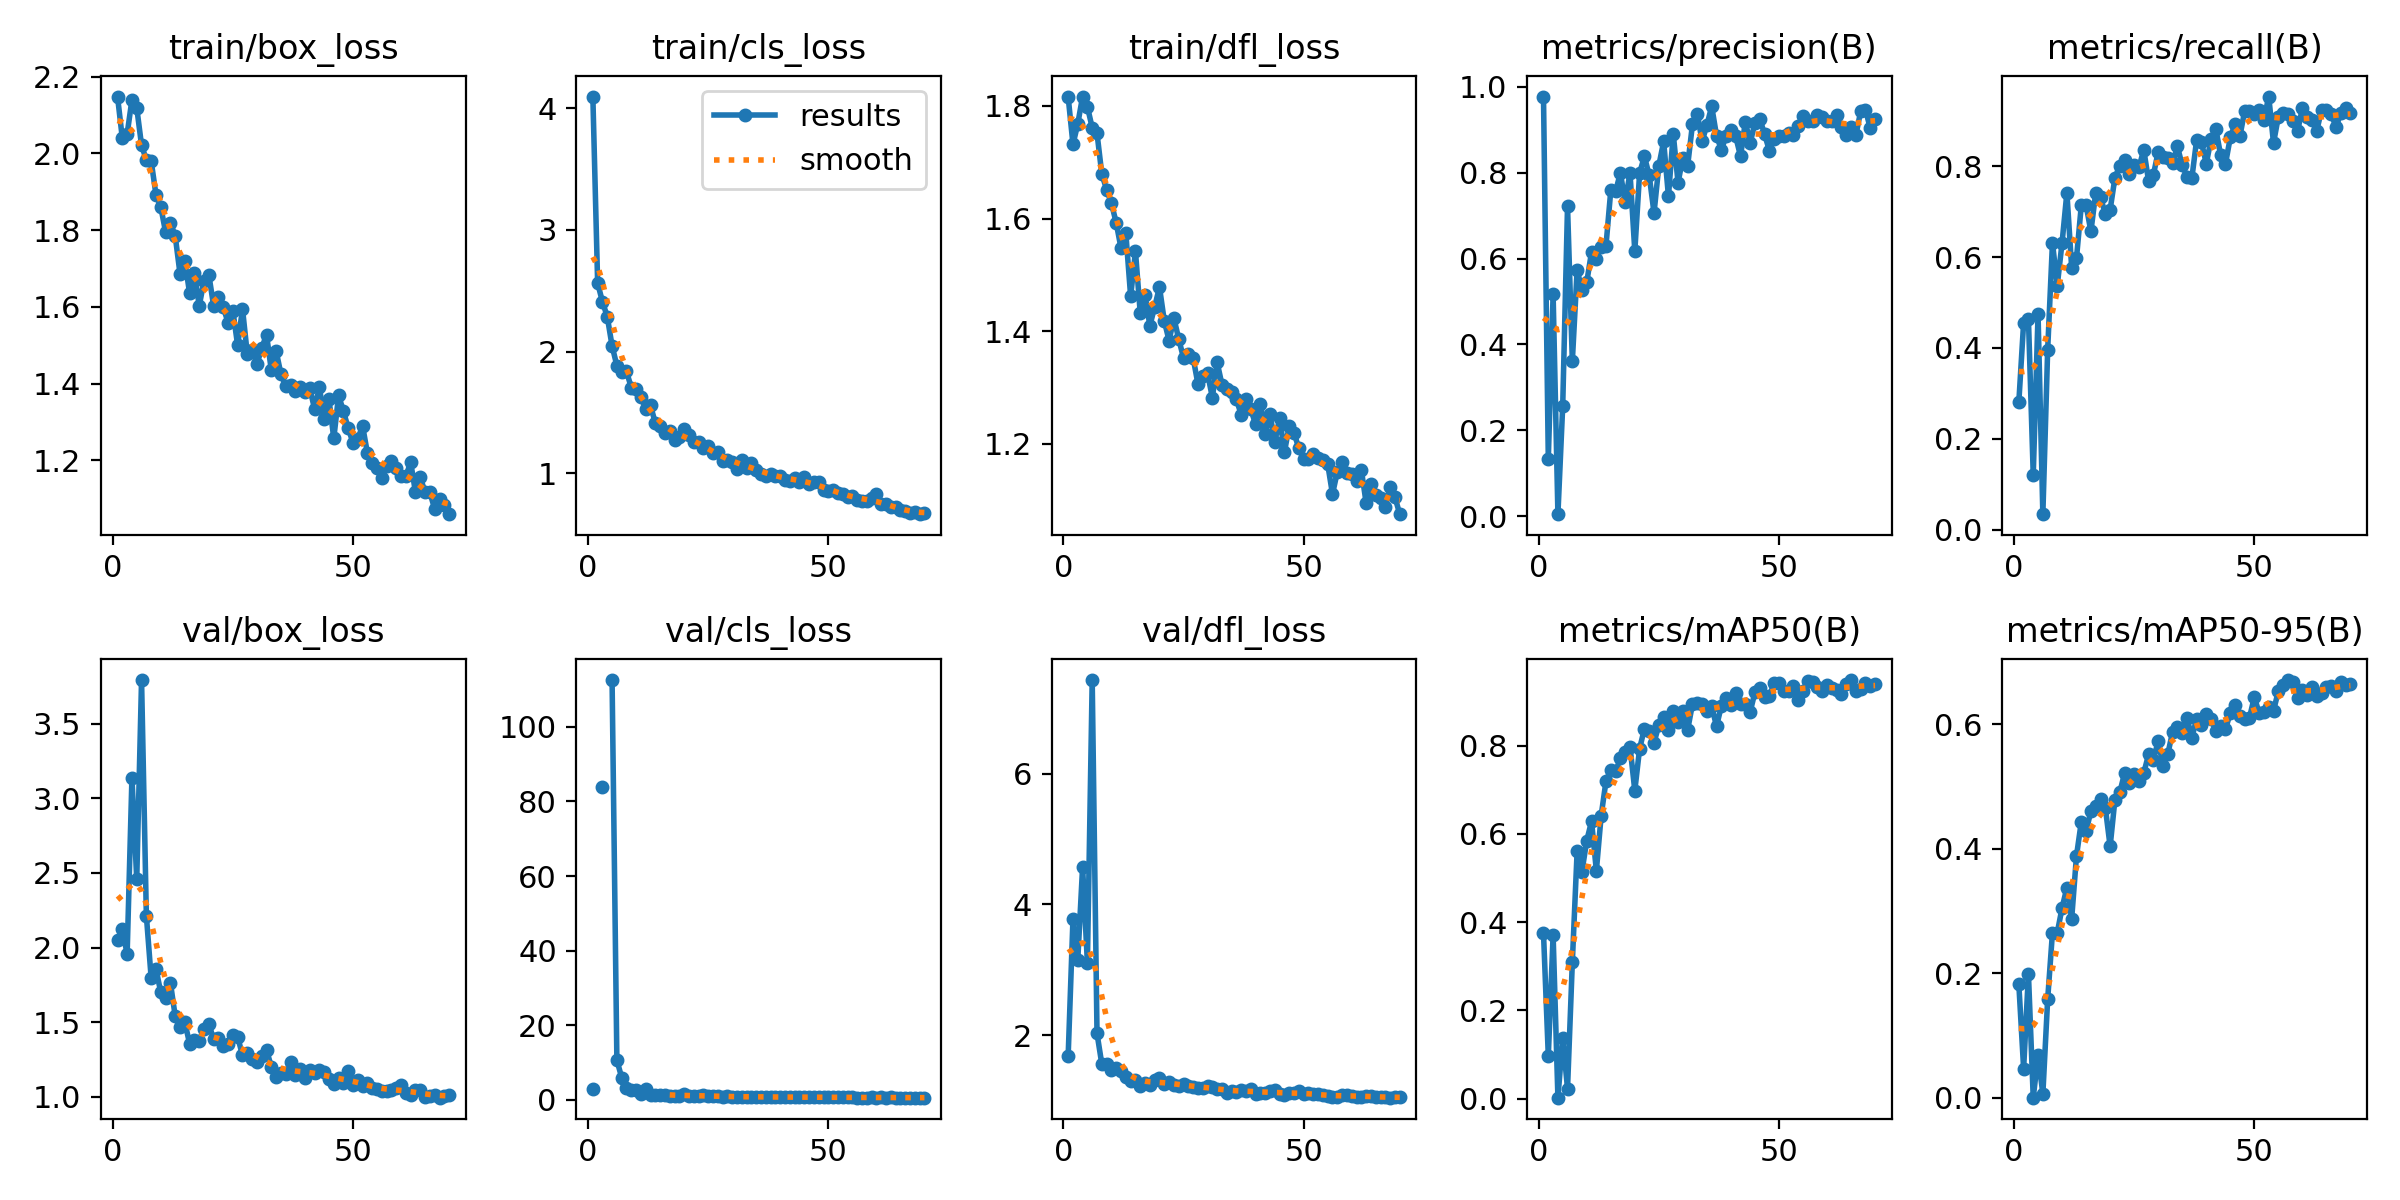

In [ ]:
Image("/content/runs/detect/ufmg_yolov11m_run1/results.png", width=600)

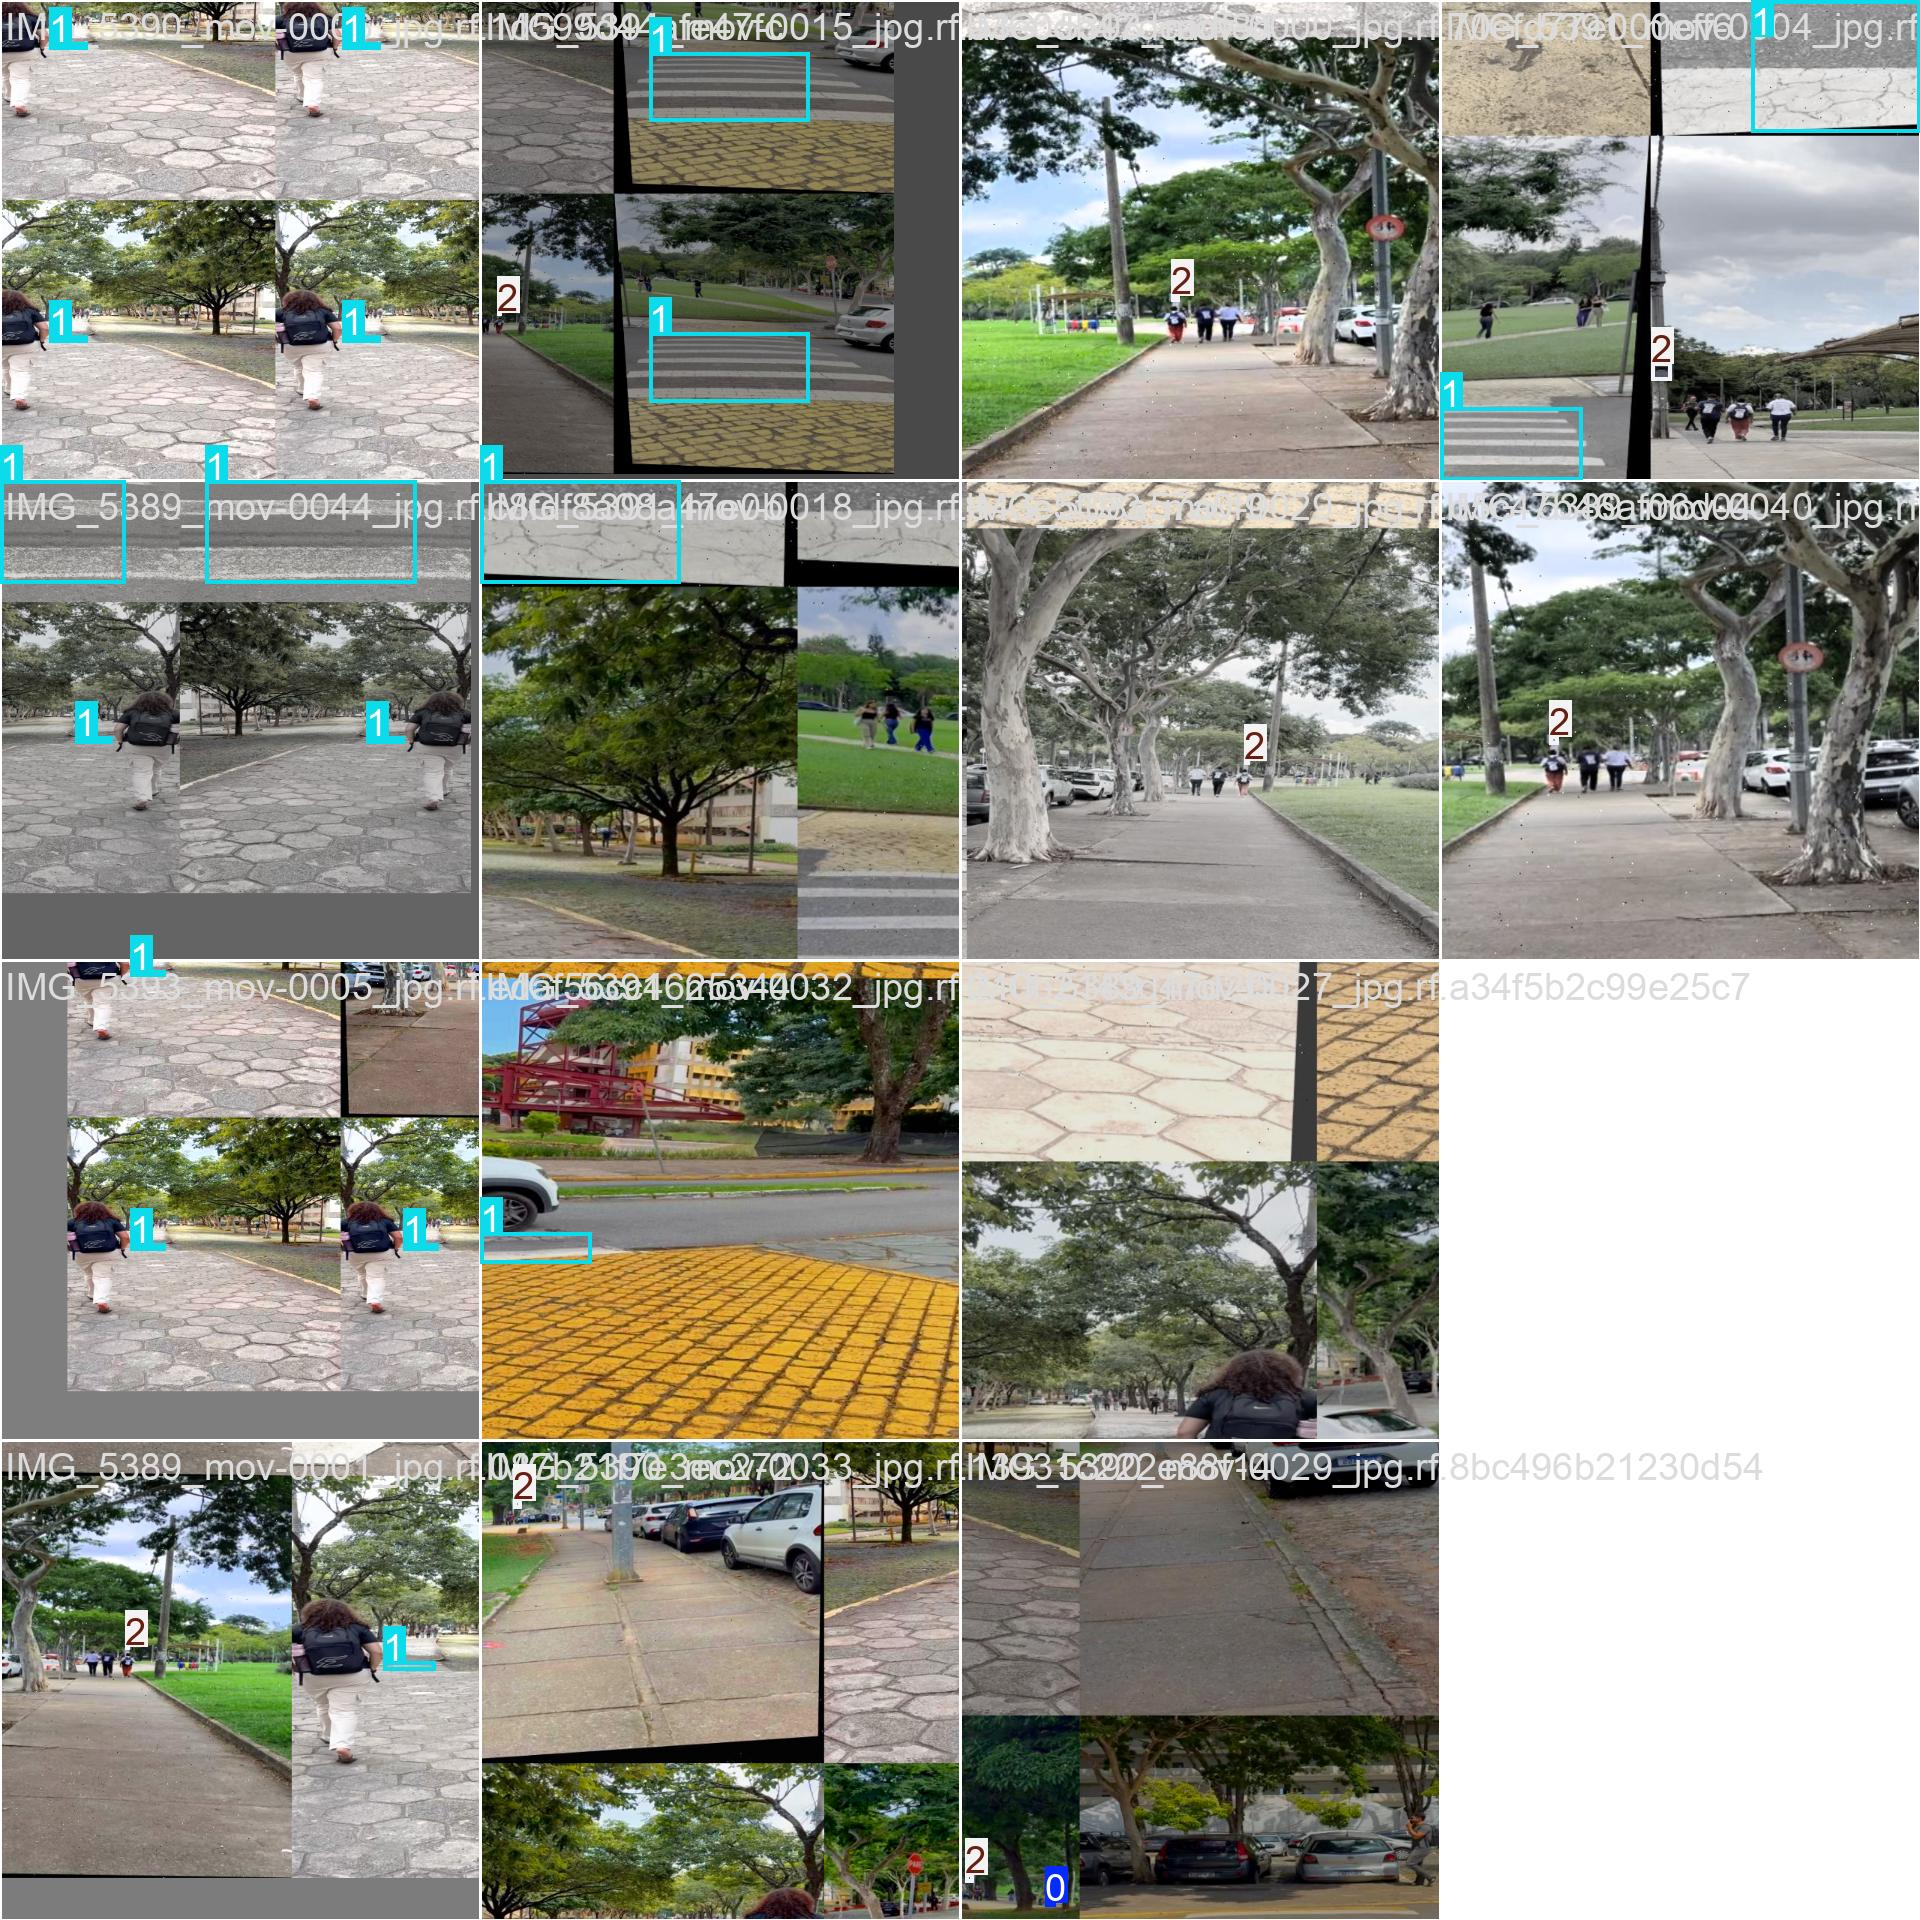

In [ ]:
Image("/content/runs/detect/ufmg_yolov11m_run1/train_batch0.jpg", width=600)

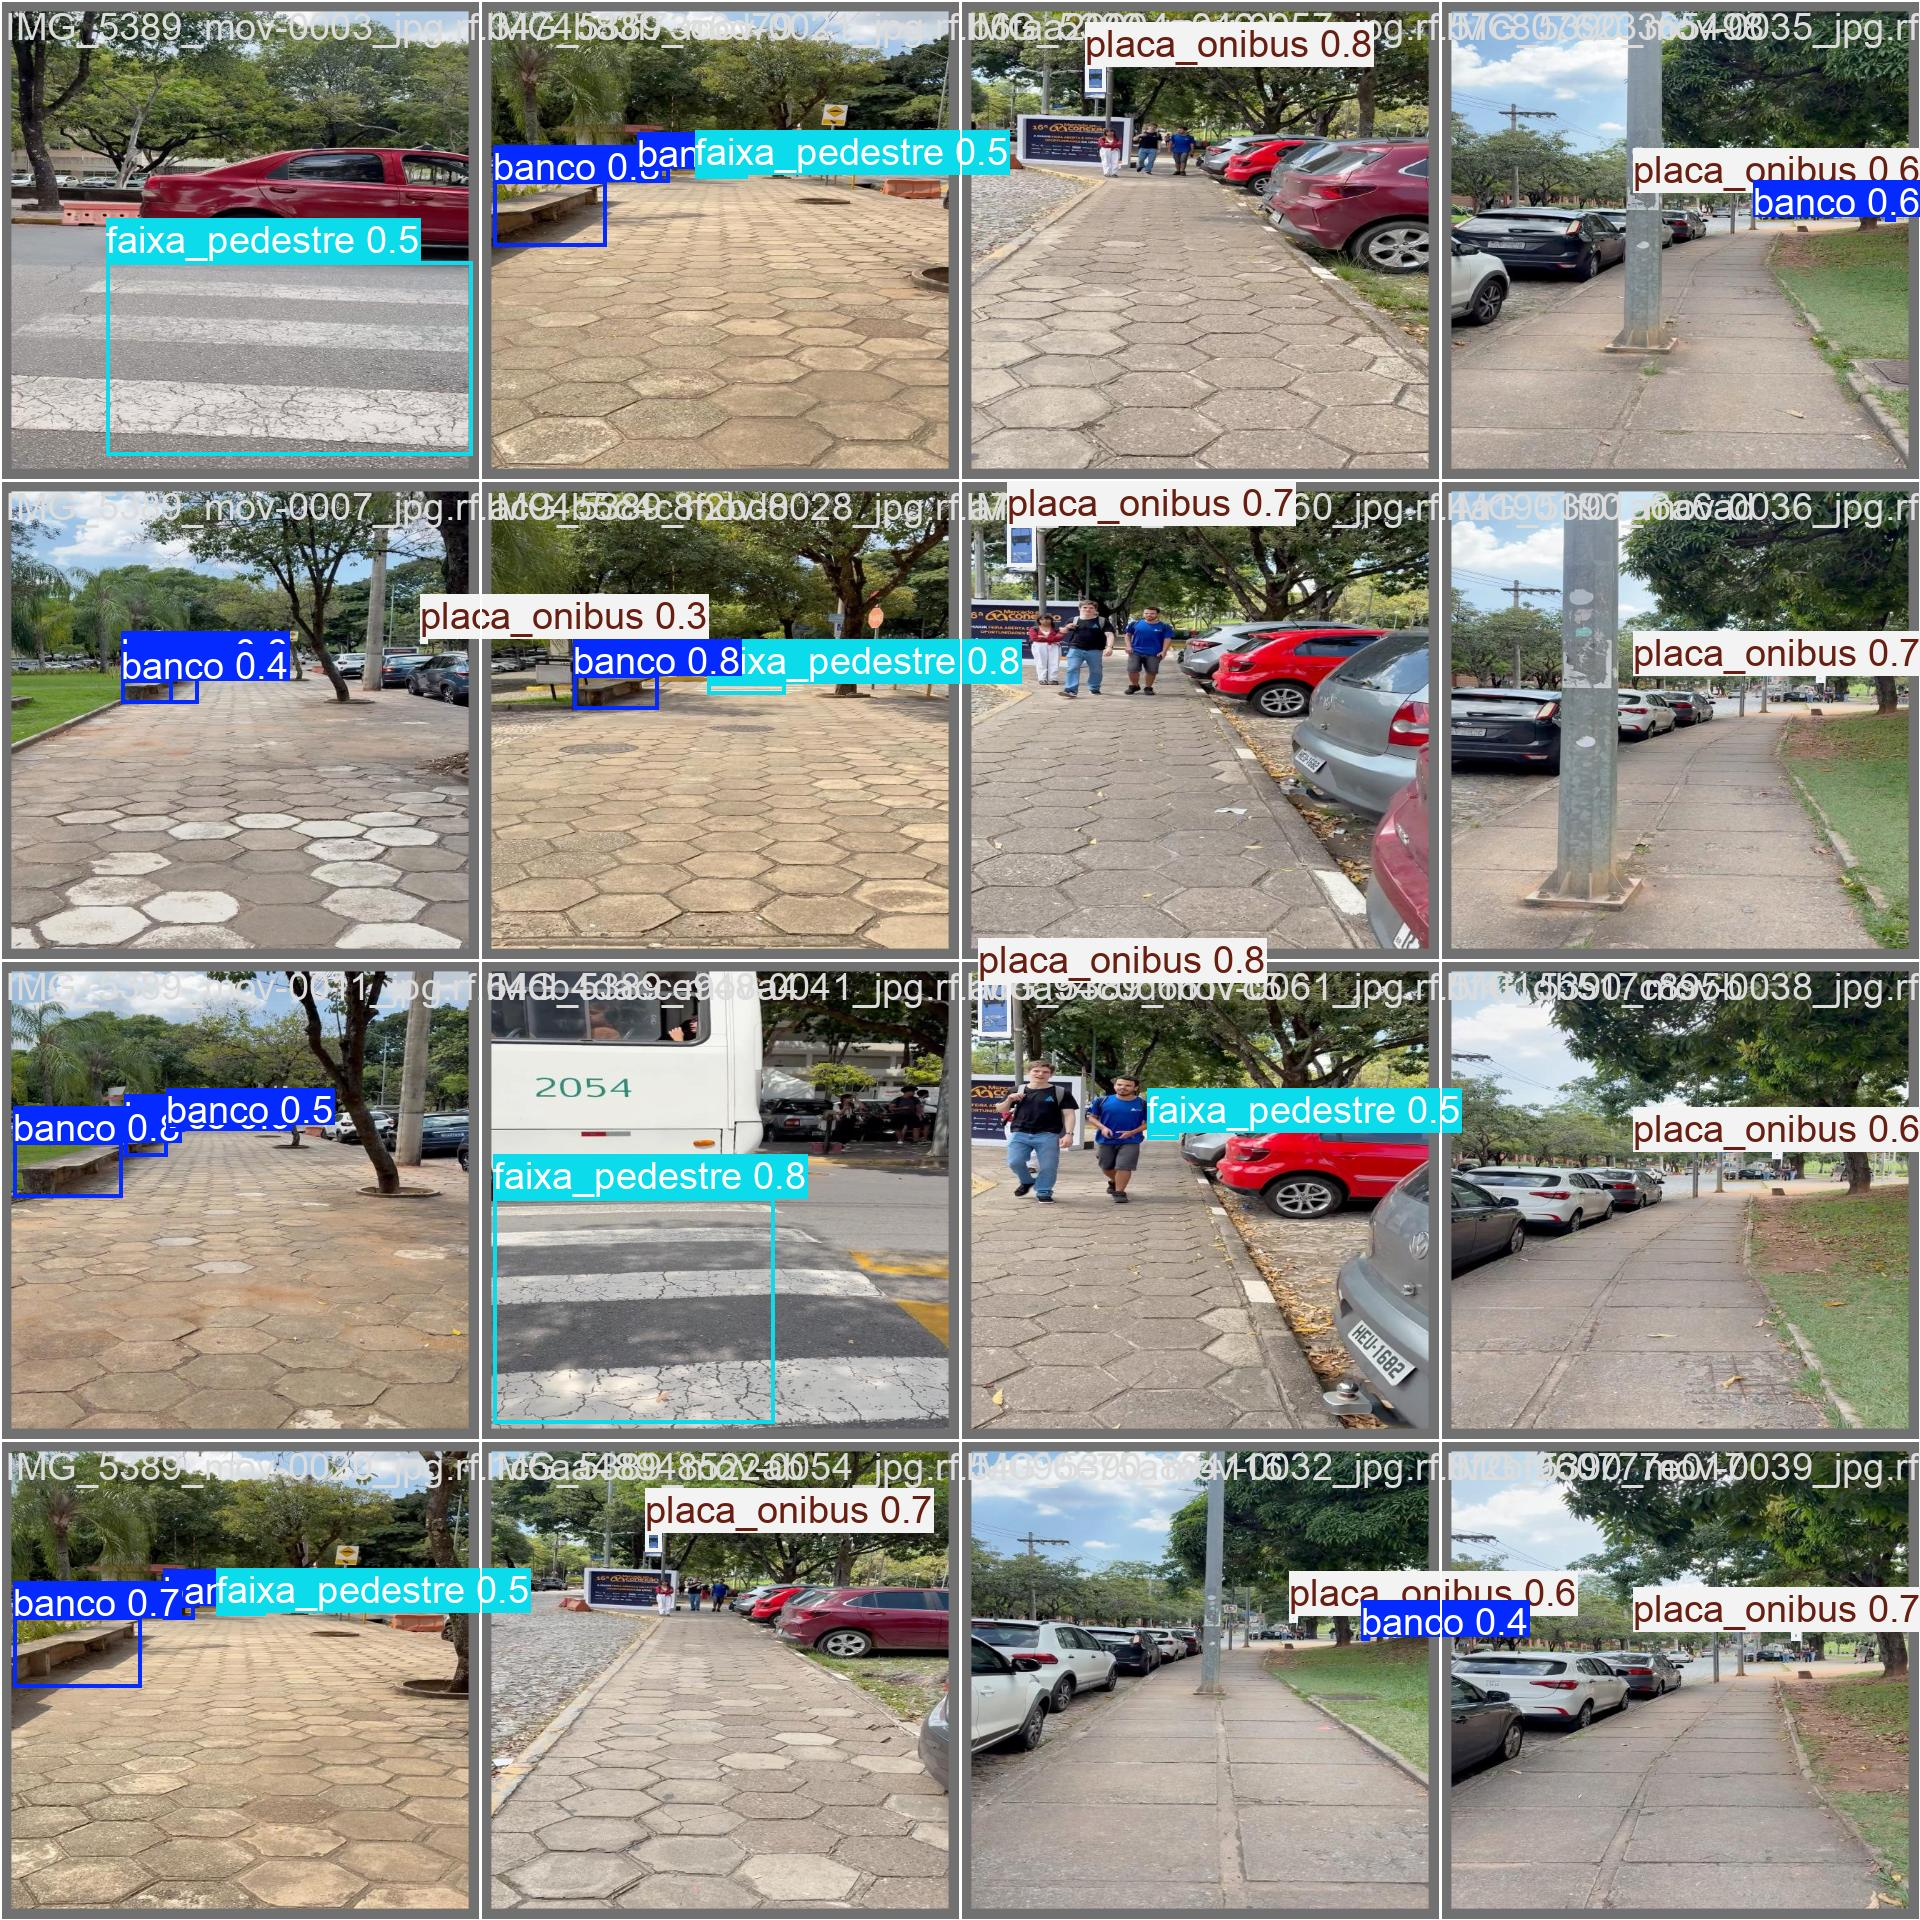

In [ ]:
Image("/content/runs/detect/ufmg_yolov11m_run1/val_batch0_pred.jpg", width=600)

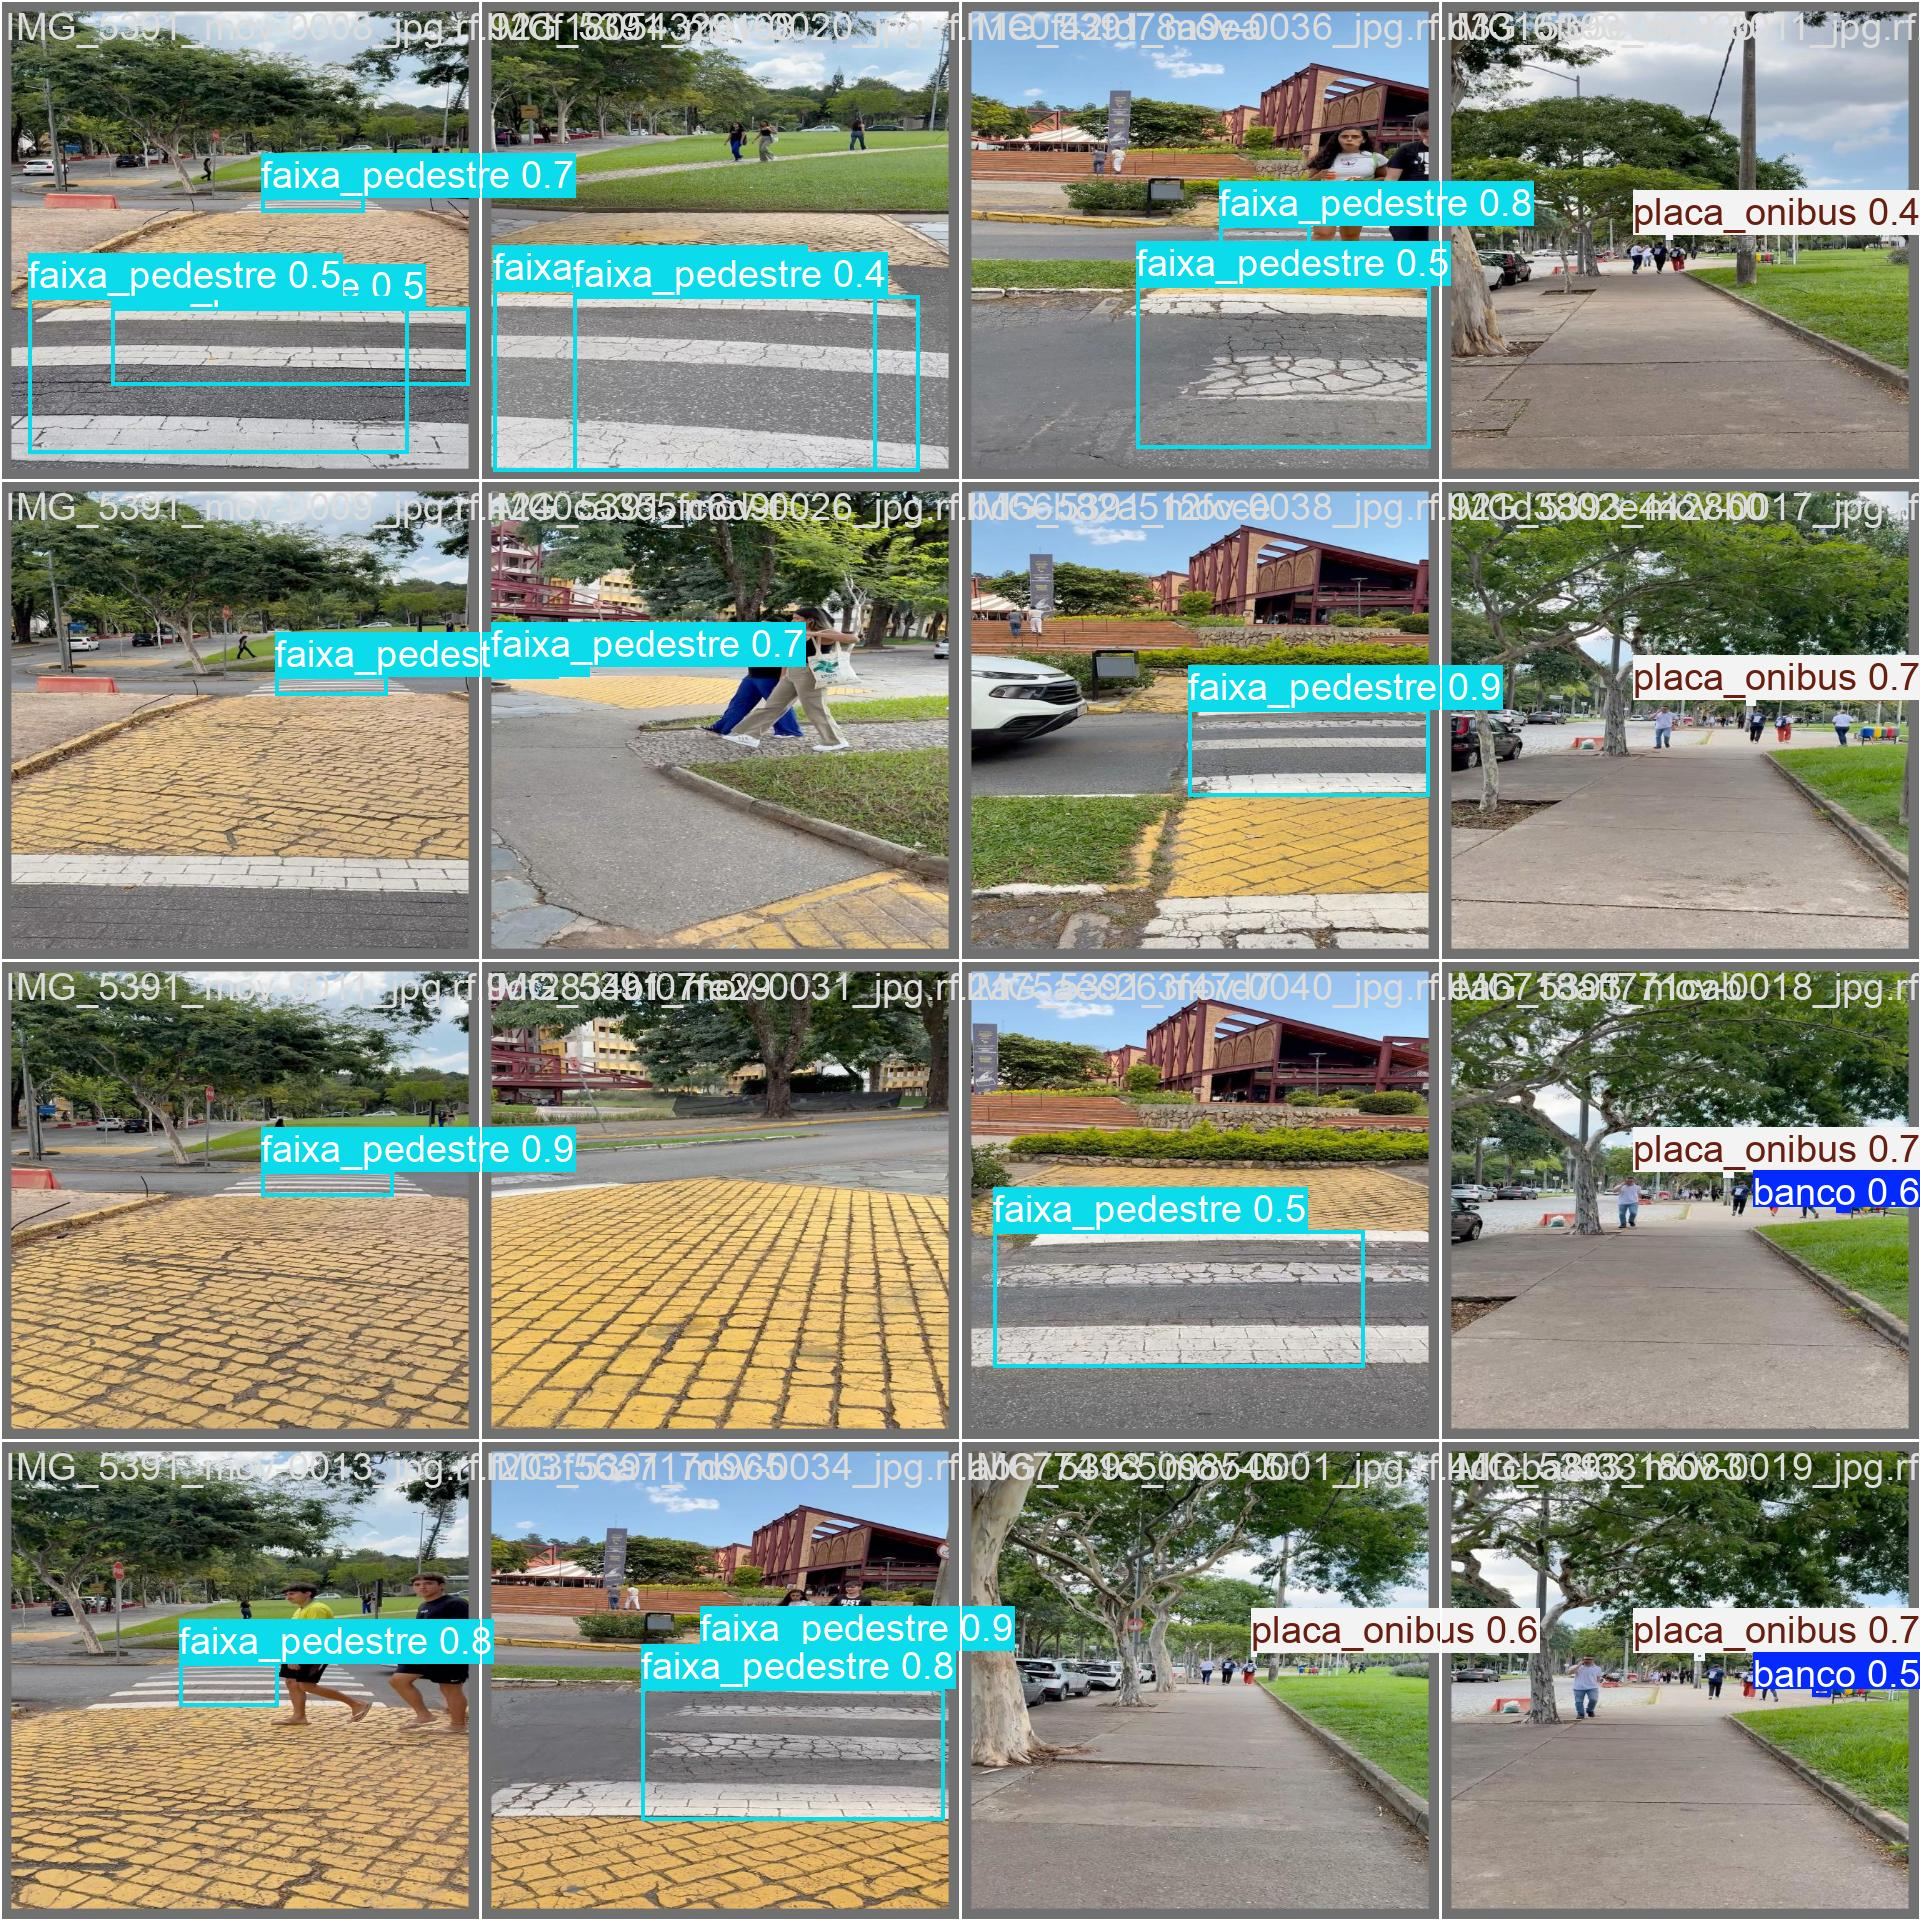

In [ ]:
Image("/content/runs/detect/ufmg_yolov11m_run1/val_batch1_pred.jpg", width=600)

**Step # 07  Validate Fine-Tuned Model**

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/ufmg_yolov11m_run1/weights/best.pt data={dataset.location}/data.yaml split=val

Ultralytics 8.3.123 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1784.6±1117.7 MB/s, size: 89.6 KB)
val: Scanning /content/UFMG-2/valid/labels.cache... 53 images, 0 backgrounds, 0 corrupt: 100% 53/53 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:02<00:00,  1.43it/s]
                   all         53        105      0.921      0.915      0.944      0.672
                 banco         29         48      0.848      0.815      0.872      0.615
        faixa_pedestre         19         23      0.915      0.933      0.965      0.637
          placa_onibus         34         34          1      0.997      0.995      0.764
Speed: 4.0ms preprocess, 29.1ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultr